In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dir_datasets = '/content/drive/MyDrive/DataScience/Data Science Course/0.Datasets/{}'
df_boston = pd.read_csv(dir_datasets.format('Boston+House+Prices.csv'))

In [ ]:
df_boston.head()

,Rooms,Distance,Value
0,6.575,4.0900,24.0
1,6.421,4.9671,21.6
2,7.185,4.9671,34.7
3,6.998,6.0622,33.4
4,7.147,6.0622,36.2


# **Regresion Lineal con Statsmodels**

In [ ]:
import statsmodels.api as sm 

**1. Regresion Lineal Simple**

**1.1 Definir las variables dependientes e independientes**

In [ ]:
x = df_boston['Rooms'] # definimos mi variable independiente

y = df_boston['Value'] # definimos mi variable dependiente

**1.2 Explorar el dataset**

<AxesSubplot:xlabel='Rooms', ylabel='Value'>

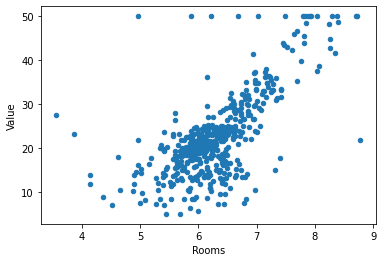

In [ ]:
df_boston.plot(kind='scatter',
               x='Rooms',
               y='Value')

**1.3 Crear la regresion : Agregar constante y ajustar modelo**

In [ ]:
x = sm.add_constant(x) # tenemos que agregar la constante porque statsmodels no la agrega por defecto
lm = sm.OLS(y, x).fit() # (dep, indep), lm: linear model, con esto sacamos el modelo

In [ ]:
lm.predict(x)

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64

**1.4 La tabla de Regresion**

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           2.49e-74
Time:                        02:51:43   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
Rooms          9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
'''
Informacion Importante
- Dep. Variable : indica cual es la variable dependiente que se esta trabajando 
- R-squared : R cuadrado, numeros de 0 a 1, cuando toma valor 0 es porque no explica nada de la variabilidad de la data. 
Si R cuadrado tiene valor de 1 es porque explica la variabilidad de la data.
-std err: error de la desviacion estandar, entre mas bajo sea mejor sera la prediccion
'''

**1.5 Ecuacion de la Regresion Lineal**

In [ ]:
# Coef Rooms : 9.1021 : a
# Coef const: -34.6706 : b

# Ecuacion lineal : y = ax + b
y_pred = 9.1021*x['Rooms'] - 34.6706

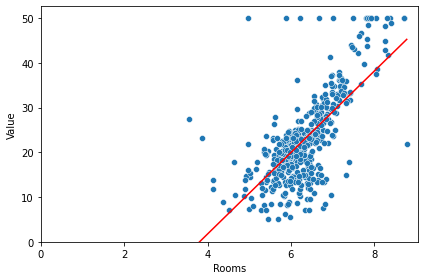

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# graficar los puntos
plt.figure(figsize=(6,4), tight_layout=True)
sns.scatterplot(x=x['Rooms'], y=y)

# graficar la linea
sns.lineplot(x=x['Rooms'], y=y_pred, color='red')

# axis
plt.xlim(0)
plt.ylim(0)
plt.savefig('linear_regression')
plt.show()